In [184]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [185]:
for i in range(8):
    if i==0:
        train = pd.read_pickle('salida/nuevo4d/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4d/RTE3/DEV_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [186]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,1.416,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,12,1.333333,0,,0,,0.0,YES
1,0.000000,0.000000,1.992,0.000,0.000000,0.000000,0.000000,4,0.000000,0,3,0,12,1.999999,0,,0,,0.0,NO
2,1.013060,2.930631,1.924,2.121,3.848347,0.005805,0.432101,3,0.125000,0,5,2,16,1.799973,0,,0,,0.0,UNKNOWN
3,0.000000,0.000000,2.163,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,19,2.000000,0,,0,,0.0,YES
4,1.615766,2.837574,2.219,2.399,4.286144,0.003260,0.690800,1,0.222222,0,3,2,9,1.600000,0,,0,,0.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,1.742,0.000,0.000000,0.000000,0.000000,6,0.000000,0,5,0,11,1.200000,0,,0,,0.0,UNKNOWN
796,0.000000,0.000000,1.571,0.000,0.000000,0.000000,0.000000,8,0.000000,0,7,0,16,1.999999,0,,0,,0.0,YES
797,0.243011,2.452737,1.468,1.024,1.925829,0.024390,0.107793,1,0.166667,0,3,2,12,1.666605,0,,0,,0.0,UNKNOWN
798,0.000000,0.000000,2.295,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,10,1.400000,0,,0,,0.0,NO


In [243]:
train["Jaro-Winkler_rit"]=train["Jaro-Winkler_rit"]/2

<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

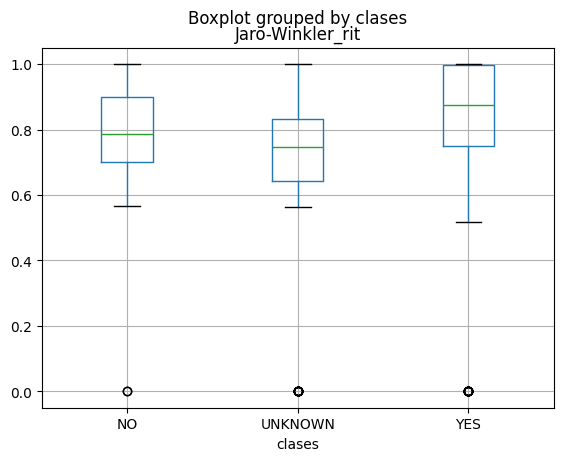

In [244]:
train.boxplot(by="clases",column="Jaro-Winkler_rit")

## Eliminar características

In [188]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,1.416,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,12,1.333333,0,,0,,0.0,YES
1,0.000000,0.000000,1.992,0.000,0.000000,0.000000,0.000000,4,0.000000,0,3,0,12,1.999999,0,,0,,0.0,NO
2,1.013060,2.930631,1.924,2.121,3.848347,0.005805,0.432101,3,0.125000,0,5,2,16,1.799973,0,,0,,0.0,UNKNOWN
3,0.000000,0.000000,2.163,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,19,2.000000,0,,0,,0.0,YES
4,1.615766,2.837574,2.219,2.399,4.286144,0.003260,0.690800,1,0.222222,0,3,2,9,1.600000,0,,0,,0.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,1.742,0.000,0.000000,0.000000,0.000000,6,0.000000,0,5,0,11,1.200000,0,,0,,0.0,UNKNOWN
796,0.000000,0.000000,1.571,0.000,0.000000,0.000000,0.000000,8,0.000000,0,7,0,16,1.999999,0,,0,,0.0,YES
797,0.243011,2.452737,1.468,1.024,1.925829,0.024390,0.107793,1,0.166667,0,3,2,12,1.666605,0,,0,,0.0,UNKNOWN
798,0.000000,0.000000,2.295,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,10,1.400000,0,,0,,0.0,NO


In [189]:
train[(train["list_m"]!=0) & (train["clases"]=="YES")]

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
4,1.615766,2.837574,2.219,2.399,4.286144,0.003260,0.690800,1,0.222222,0,3,2,9,1.600000,0,,0,,0.0,YES
6,1.117820,1.429326,1.777,1.784,3.641675,0.004853,0.312394,3,0.083333,0,4,1,12,1.571184,0,,0,,0.0,YES
12,0.609809,1.449391,1.925,1.296,3.797640,0.004267,0.123798,3,0.076923,0,4,1,13,1.999607,0,,0,,0.0,YES
16,1.652796,5.784747,2.040,2.034,4.521604,0.001095,0.819574,1,0.307692,0,5,4,13,1.712870,0,,0,,0.0,YES
23,1.509191,2.953140,2.204,2.327,4.298644,0.001719,0.769220,2,0.166667,0,4,2,12,1.833333,0,,0,,0.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,1.944841,1.428067,2.023,1.522,4.714801,0.000000,1.000000,5,0.071429,0,6,1,14,2.000000,0,,0,,0.0,YES
783,1.150541,5.751273,2.287,2.209,4.262429,0.002342,0.650986,1,0.571429,0,5,4,7,1.832357,0,,0,,0.0,YES
791,1.116025,1.452324,2.281,2.171,3.867028,0.003593,0.378576,4,0.100000,0,5,1,10,1.833248,1,make,0,,0.0,YES
794,1.260344,5.787282,1.784,1.811,4.295817,0.002257,0.645629,3,0.250000,0,7,4,16,1.768790,0,,0,,0.0,YES


In [190]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'verbT',
       'negH', 'verbH', 'overlap_ent', 'clases'],
      dtype='object')

In [191]:
train=train.drop(["verbT","verbH"],axis=1)

In [192]:
train[(train["clases"]!="YES") & (train["sumas"]==0)]

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
1,0.0,0.000000,1.992,0.0,0.000000e+00,0.000000,0.0,4,0.000000,0,3,0,12,1.999999,0,0,0.0,NO
8,0.0,1.000036,1.708,0.0,1.117773e-12,0.035823,0.0,2,0.090909,0,3,1,11,1.999998,0,0,0.0,UNKNOWN
17,0.0,0.000000,2.017,0.0,0.000000e+00,0.000000,0.0,3,0.000000,0,3,0,6,1.749929,0,0,0.0,NO
18,0.0,0.000000,0.827,0.0,0.000000e+00,0.000000,0.0,3,0.000000,0,3,0,9,1.333272,0,0,0.0,NO
20,0.0,0.000000,1.970,0.0,0.000000e+00,0.000000,0.0,4,0.000000,0,4,0,12,1.713492,0,0,0.0,UNKNOWN
40,0.0,0.000000,1.163,0.0,0.000000e+00,0.000000,0.0,3,0.000000,0,3,0,9,1.999512,0,0,0.0,UNKNOWN
41,0.0,0.000000,0.770,0.0,0.000000e+00,0.000000,0.0,3,0.000000,0,3,0,10,1.500000,0,0,0.0,NO
59,0.0,0.000000,1.249,0.0,0.000000e+00,0.000000,0.0,4,0.000000,0,3,0,7,1.399268,0,0,0.0,NO
84,0.0,0.000000,2.124,0.0,0.000000e+00,0.000000,0.0,3,0.000000,0,3,0,13,0.000000,0,0,0.0,UNKNOWN
89,0.0,0.000000,1.849,0.0,0.000000e+00,0.000000,0.0,3,0.000000,0,3,0,10,1.749878,1,1,0.0,NO


In [193]:
#train = train[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,1.416,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,12,1.333333,0,0,0.0,YES
1,0.000000,0.000000,1.992,0.000,0.000000,0.000000,0.000000,4,0.000000,0,3,0,12,1.999999,0,0,0.0,NO
2,1.013060,2.930631,1.924,2.121,3.848347,0.005805,0.432101,3,0.125000,0,5,2,16,1.799973,0,0,0.0,UNKNOWN
3,0.000000,0.000000,2.163,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,19,2.000000,0,0,0.0,YES
4,1.615766,2.837574,2.219,2.399,4.286144,0.003260,0.690800,1,0.222222,0,3,2,9,1.600000,0,0,0.0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.000000,0.000000,1.742,0.000,0.000000,0.000000,0.000000,6,0.000000,0,5,0,11,1.200000,0,0,0.0,UNKNOWN
796,0.000000,0.000000,1.571,0.000,0.000000,0.000000,0.000000,8,0.000000,0,7,0,16,1.999999,0,0,0.0,YES
797,0.243011,2.452737,1.468,1.024,1.925829,0.024390,0.107793,1,0.166667,0,3,2,12,1.666605,0,0,0.0,UNKNOWN
798,0.000000,0.000000,2.295,0.000,0.000000,0.000000,0.000000,3,0.000000,0,3,0,10,1.400000,0,0,0.0,NO


In [194]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [195]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [196]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.240261,0.390214,0.723429,0.670427,-0.117400,0.826617,-0.230034,0.045405,0.049419,0.038128,0.227073,0.312071,0.054504,0.050426,-0.025423,NaN
distancias,0.240261,1.000000,-0.018304,0.551792,0.525450,0.211847,0.269460,-0.564641,0.793151,0.045851,0.551511,0.997867,-0.013577,-0.190937,-0.054241,-0.031321,NaN
entropia_total,0.390214,-0.018304,1.000000,0.393905,0.224900,-0.101468,0.312580,0.095336,0.024943,0.018149,0.072036,-0.043704,-0.065799,0.076568,0.078759,-0.006623,NaN
entropias,0.723429,0.551792,0.393905,1.000000,0.913040,0.142597,0.714355,-0.497176,0.447271,0.060057,0.115335,0.533708,-0.026293,-0.115095,-0.045027,-0.040444,NaN
mutinf,0.670427,0.525450,0.224900,0.913040,1.000000,0.112037,0.743971,-0.485042,0.400881,0.011762,0.097580,0.504229,-0.000074,-0.115800,-0.065245,-0.042546,NaN
mearts,-0.117400,0.211847,-0.101468,0.142597,0.112037,1.000000,-0.169687,-0.234912,0.221941,0.098420,0.027182,0.229955,-0.105067,-0.096867,-0.047976,-0.027160,NaN
max_info,0.826617,0.269460,0.312580,0.714355,0.743971,-0.169687,1.000000,-0.262911,0.172153,0.030945,0.039328,0.256944,0.066700,0.023860,-0.023337,-0.027950,NaN
list_comp,-0.230034,-0.564641,0.095336,-0.497176,-0.485042,-0.234912,-0.262911,1.000000,-0.482207,-0.023444,0.366375,-0.567274,0.078510,0.249487,0.097481,0.070095,NaN
diferencias,0.045405,0.793151,0.024943,0.447271,0.400881,0.221941,0.172153,-0.482207,1.000000,0.029004,0.408745,0.797719,-0.410534,-0.190899,-0.093617,-0.020581,NaN
list_incomp,0.049419,0.045851,0.018149,0.060057,0.011762,0.098420,0.030945,-0.023444,0.029004,1.000000,0.027890,0.050040,0.012574,-0.011148,0.050328,-0.011685,NaN


<Axes: >

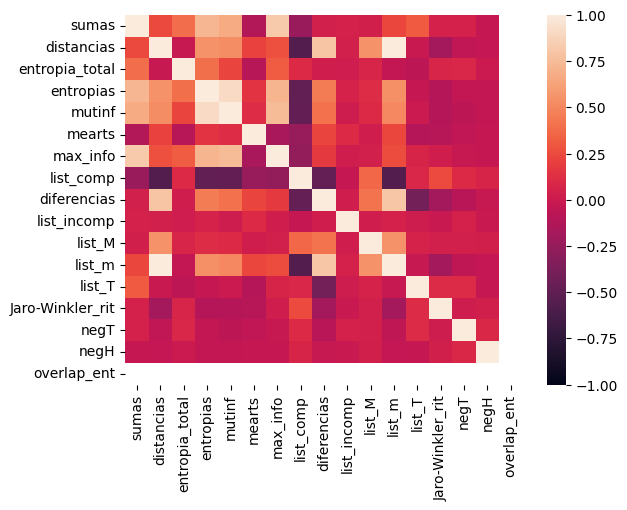

In [197]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [198]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.240261,0.390214,0.723429,0.670427,-0.117400,0.826617,-0.230034,0.045405,0.049419,0.038128,0.227073,0.312071,0.054504,0.050426,-0.025423,NaN
distancias,0.240261,1.000000,-0.018304,0.551792,0.525450,0.211847,0.269460,-0.564641,0.793151,0.045851,0.551511,0.997867,-0.013577,-0.190937,-0.054241,-0.031321,NaN
entropia_total,0.390214,-0.018304,1.000000,0.393905,0.224900,-0.101468,0.312580,0.095336,0.024943,0.018149,0.072036,-0.043704,-0.065799,0.076568,0.078759,-0.006623,NaN
entropias,0.723429,0.551792,0.393905,1.000000,0.913040,0.142597,0.714355,-0.497176,0.447271,0.060057,0.115335,0.533708,-0.026293,-0.115095,-0.045027,-0.040444,NaN
mutinf,0.670427,0.525450,0.224900,0.913040,1.000000,0.112037,0.743971,-0.485042,0.400881,0.011762,0.097580,0.504229,-0.000074,-0.115800,-0.065245,-0.042546,NaN
mearts,-0.117400,0.211847,-0.101468,0.142597,0.112037,1.000000,-0.169687,-0.234912,0.221941,0.098420,0.027182,0.229955,-0.105067,-0.096867,-0.047976,-0.027160,NaN
max_info,0.826617,0.269460,0.312580,0.714355,0.743971,-0.169687,1.000000,-0.262911,0.172153,0.030945,0.039328,0.256944,0.066700,0.023860,-0.023337,-0.027950,NaN
list_comp,-0.230034,-0.564641,0.095336,-0.497176,-0.485042,-0.234912,-0.262911,1.000000,-0.482207,-0.023444,0.366375,-0.567274,0.078510,0.249487,0.097481,0.070095,NaN
diferencias,0.045405,0.793151,0.024943,0.447271,0.400881,0.221941,0.172153,-0.482207,1.000000,0.029004,0.408745,0.797719,-0.410534,-0.190899,-0.093617,-0.020581,NaN
list_incomp,0.049419,0.045851,0.018149,0.060057,0.011762,0.098420,0.030945,-0.023444,0.029004,1.000000,0.027890,0.050040,0.012574,-0.011148,0.050328,-0.011685,NaN


In [199]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
distancias,0.240261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
entropia_total,0.390214,-0.018304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
entropias,0.723429,0.551792,0.393905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
mutinf,0.670427,0.525450,0.224900,0.913040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
mearts,-0.117400,0.211847,-0.101468,0.142597,0.112037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
max_info,0.826617,0.269460,0.312580,0.714355,0.743971,-0.169687,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
list_comp,-0.230034,-0.564641,0.095336,-0.497176,-0.485042,-0.234912,-0.262911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
diferencias,0.045405,0.793151,0.024943,0.447271,0.400881,0.221941,0.172153,-0.482207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0
list_incomp,0.049419,0.045851,0.018149,0.060057,0.011762,0.098420,0.030945,-0.023444,0.029004,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0


In [200]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

entropias sumas 0.7234292557282019
mutinf entropias 0.9130403410318917
max_info sumas 0.8266168132830567
max_info entropias 0.714354951894221
max_info mutinf 0.7439709772551523
diferencias distancias 0.7931514791413975
list_m distancias 0.9978672700265517
list_m diferencias 0.7977194446735097


In [201]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

In [202]:
# Checar variables colineales
#sns.relplot(data=train_m, x="mutinf", y="sumas")

In [203]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [204]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

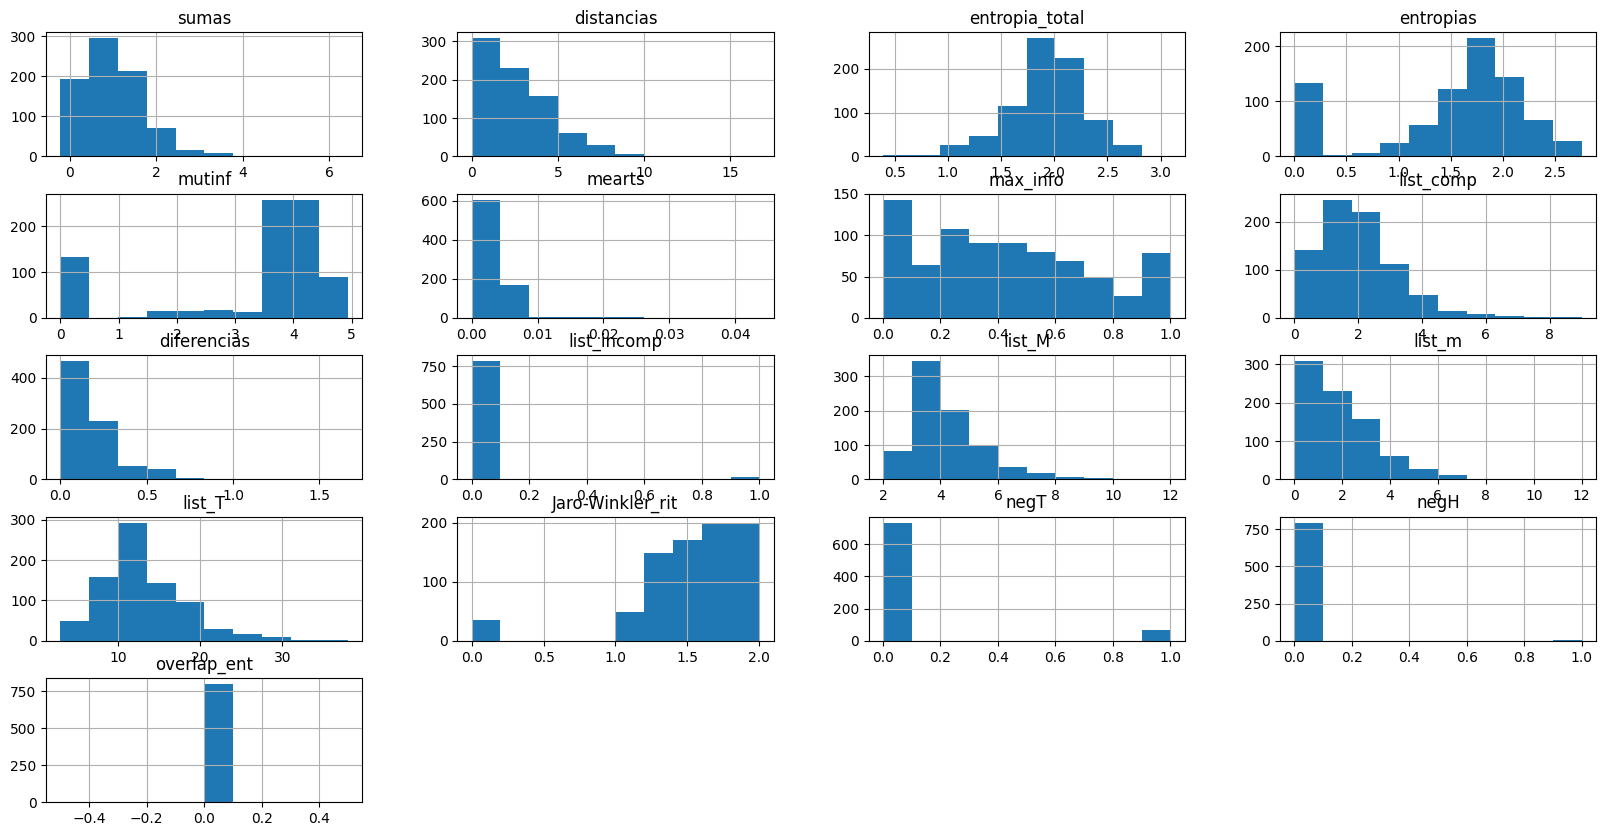

In [205]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [206]:
for i in range(8):
    if i==0:
        test = pd.read_pickle('salida/nuevo4d/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4d/RTE3/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [207]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,2.285,0.000,0.000000e+00,0.000000,0.000000,4,0.000000,0,4,0,14,1.400000,0,,0,,0.0,YES
1,0.000000,0.000000,2.057,0.000,0.000000e+00,0.000000,0.000000,3,0.000000,0,3,0,14,1.800000,0,,0,,0.0,YES
2,0.498795,2.415953,0.469,0.469,1.969119e+00,0.000000,0.500000,0,0.400000,0,2,2,5,1.499817,0,,0,,0.0,YES
3,0.000000,1.000053,1.505,0.000,1.521449e-12,0.000000,0.000000,2,0.100000,0,3,1,10,1.666666,0,,0,,0.0,YES
4,0.294009,2.452995,1.515,1.319,1.940065e+00,0.002136,0.100528,1,0.200000,0,3,2,10,0.000000,0,,0,,0.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.226224,2.910204,2.000,2.000,3.829676e+00,0.004296,0.538233,2,0.153846,1,4,2,13,1.399022,1,rush,0,,0.0,YES
796,1.186416,2.428087,1.629,1.356,2.338976e+00,0.000000,0.500000,1,0.166667,0,3,2,12,1.666667,0,,0,,0.0,NO
797,2.079727,1.439489,1.537,1.450,4.869917e+00,0.000000,1.000000,2,0.058824,0,3,1,17,0.000000,0,,0,,0.0,UNKNOWN
798,0.397318,2.863823,1.952,1.650,3.778098e+00,0.004712,0.183630,1,0.333333,0,3,2,6,1.500000,0,,0,,0.0,UNKNOWN


In [208]:
#test=test.drop(["diferencias","list_m","list_M","list_T"],axis=1)
#test = test[['list_incomp','list_incomp','Jaro-Winkler_rit','list_m','negT', 'negH','clases']]



In [209]:
test=test.drop(["verbT","verbH"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,2.285,0.000,0.000000e+00,0.000000,0.000000,4,0.000000,0,4,0,14,1.400000,0,0,0.0,YES
1,0.000000,0.000000,2.057,0.000,0.000000e+00,0.000000,0.000000,3,0.000000,0,3,0,14,1.800000,0,0,0.0,YES
2,0.498795,2.415953,0.469,0.469,1.969119e+00,0.000000,0.500000,0,0.400000,0,2,2,5,1.499817,0,0,0.0,YES
3,0.000000,1.000053,1.505,0.000,1.521449e-12,0.000000,0.000000,2,0.100000,0,3,1,10,1.666666,0,0,0.0,YES
4,0.294009,2.452995,1.515,1.319,1.940065e+00,0.002136,0.100528,1,0.200000,0,3,2,10,0.000000,0,0,0.0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.226224,2.910204,2.000,2.000,3.829676e+00,0.004296,0.538233,2,0.153846,1,4,2,13,1.399022,1,0,0.0,YES
796,1.186416,2.428087,1.629,1.356,2.338976e+00,0.000000,0.500000,1,0.166667,0,3,2,12,1.666667,0,0,0.0,NO
797,2.079727,1.439489,1.537,1.450,4.869917e+00,0.000000,1.000000,2,0.058824,0,3,1,17,0.000000,0,0,0.0,UNKNOWN
798,0.397318,2.863823,1.952,1.650,3.778098e+00,0.004712,0.183630,1,0.333333,0,3,2,6,1.500000,0,0,0.0,UNKNOWN


In [210]:
#test = test[['distancias', 'mutinf', 'max_info',  'diferencias','Jaro-Winkler_rit','overlap_ent','clases']]


In [211]:
# test[(test["list_m"]==0) & (test["clases"]=="NO")].shape

In [212]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [213]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [214]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [215]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.45795602, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.64424321, ..., 0.        , 0.        ,
        0.        ],
       [0.15750671, 0.17570058, 0.62225097, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.03778238, 0.14704933, 0.47477361, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.74223803, ..., 0.        , 0.        ,
        0.        ],
       [0.12757006, 0.08560932, 0.68919793, ..., 0.        , 0.        ,
        0.        ]])

In [216]:
X_train.shape

(800, 17)

In [217]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [218]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [219]:
model.decision_function(X_train)

array([ 5.75855328e-01,  1.31725269e+00,  2.55146300e-01,  1.33059763e+00,
        6.93052123e-03,  1.42391228e-01,  2.51506795e-01, -6.88949339e-01,
       -1.40933980e-01, -7.93075496e-02,  1.57407345e-01,  5.63517637e-02,
        5.49992842e-01, -8.46875996e-02, -6.86604965e-01,  2.33756379e-01,
       -6.33510221e-02,  9.10848721e-01,  3.82891311e-01,  2.60301068e-01,
        1.11972483e+00, -5.57272136e-01, -5.32934462e-02,  4.46365833e-01,
        2.74546812e-01,  3.87272561e-01,  1.16815944e-01, -1.13073511e+00,
        1.04980331e+00, -1.20218900e-01,  3.10044251e-01,  1.52560377e-01,
        2.57895341e-01, -1.64662859e-02, -3.65779315e-02, -1.01409291e+00,
        4.22381995e-02,  3.38372903e-01,  1.04232930e+00,  4.41394156e-01,
        9.22584903e-01,  4.99807926e-01,  2.66427989e-01,  2.19249765e-01,
       -1.41885642e+00, -1.17758551e+00,  5.96648018e-01,  8.23010026e-01,
        9.14208092e-01,  2.44539250e-01, -4.69056671e-01,  9.28380793e-01,
       -3.33831096e-01,  

In [220]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [221]:
model.classes_

array([0, 1])

In [222]:
model.coef_[0]

array([ 0.75137705, -1.24473676,  0.75554882, -0.71133762, -0.17515517,
       -1.12082475,  0.65180105,  1.28488963,  0.03895027, -0.39411899,
        0.05553658, -1.14305398,  0.62062112,  1.37365024, -0.17860731,
       -0.48964324,  0.        ])

In [223]:
coeficientes=model.coef_[0]

In [224]:
coeficientes

array([ 0.75137705, -1.24473676,  0.75554882, -0.71133762, -0.17515517,
       -1.12082475,  0.65180105,  1.28488963,  0.03895027, -0.39411899,
        0.05553658, -1.14305398,  0.62062112,  1.37365024, -0.17860731,
       -0.48964324,  0.        ])

In [225]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  13 Jaro-Winkler_rit 1 distancias


In [226]:

n_columns=train.shape[1]-1

In [227]:
n_columns

17

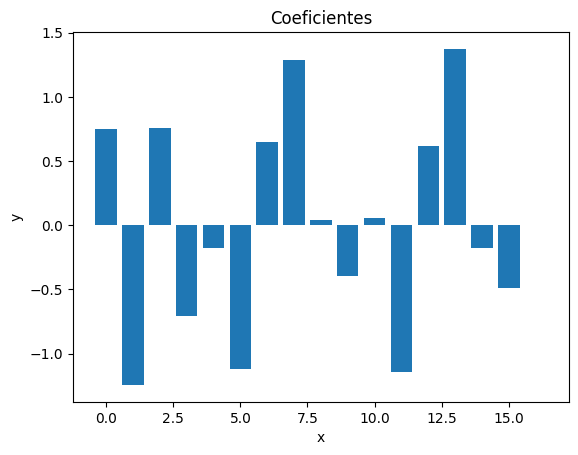

In [228]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [229]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.        , 0.        , 0.74140169, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.66742375, ..., 0.        , 0.        ,
        0.        ],
       [0.12756476, 0.15016403, 0.15217391, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.53188143, 0.08947171, 0.49870214, ..., 0.        , 0.        ,
        0.        ],
       [0.10161237, 0.17800145, 0.63335496, ..., 0.        , 0.        ,
        0.        ],
       [0.44320744, 0.08977001, 0.7761194 , ..., 0.        , 0.        ,
        0.        ]])

In [230]:
X_test.shape

(800, 17)

In [231]:
predictions = model.predict(X_test)

In [232]:
predictions

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [233]:
test["predicciones"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
0,0.000000,0.000000,2.285,0.000,0.000000e+00,0.000000,0.000000,4,0.000000,0,4,0,14,1.400000,0,0,0.0,YES,1
1,0.000000,0.000000,2.057,0.000,0.000000e+00,0.000000,0.000000,3,0.000000,0,3,0,14,1.800000,0,0,0.0,YES,1
2,0.498795,2.415953,0.469,0.469,1.969119e+00,0.000000,0.500000,0,0.400000,0,2,2,5,1.499817,0,0,0.0,YES,0
3,0.000000,1.000053,1.505,0.000,1.521449e-12,0.000000,0.000000,2,0.100000,0,3,1,10,1.666666,0,0,0.0,YES,1
4,0.294009,2.452995,1.515,1.319,1.940065e+00,0.002136,0.100528,1,0.200000,0,3,2,10,0.000000,0,0,0.0,NO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.226224,2.910204,2.000,2.000,3.829676e+00,0.004296,0.538233,2,0.153846,1,4,2,13,1.399022,1,0,0.0,YES,0
796,1.186416,2.428087,1.629,1.356,2.338976e+00,0.000000,0.500000,1,0.166667,0,3,2,12,1.666667,0,0,0.0,NO,1
797,2.079727,1.439489,1.537,1.450,4.869917e+00,0.000000,1.000000,2,0.058824,0,3,1,17,0.000000,0,0,0.0,UNKNOWN,1
798,0.397318,2.863823,1.952,1.650,3.778098e+00,0.004712,0.183630,1,0.333333,0,3,2,6,1.500000,0,0,0.0,UNKNOWN,0


In [234]:
incorrectos = test[(test["clases"]=="YES") & (test["predicciones"]==0)]
incorrectos

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predicciones
2,0.498795,2.415953,0.469,0.469,1.969119e+00,0.000000,0.500000,0,0.400000,0,2,2,5,1.499817,0,0,0.0,YES,0
22,1.054096,1.425998,1.070,1.242,3.807430e+00,0.005849,0.344185,2,0.066667,1,3,1,15,1.250000,0,0,0.0,YES,0
32,1.026665,2.857014,1.634,1.497,4.244268e+00,0.003002,0.529651,1,0.250000,0,3,2,8,1.500000,0,0,0.0,YES,0
42,0.000000,1.000010,1.708,0.000,1.111111e-12,0.038242,0.000000,4,0.125000,0,5,1,8,1.428571,0,0,0.0,YES,0
56,0.728403,3.905010,1.265,1.116,3.088470e+00,0.014181,0.666667,1,0.333333,0,4,3,9,1.833300,0,0,0.0,YES,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,1.261490,9.955170,1.854,1.832,4.251750e+00,0.002299,0.629183,4,0.636364,0,11,7,11,1.202091,0,0,0.0,YES,0
776,0.418466,2.448653,1.592,1.073,1.963124e+00,0.002086,0.098118,4,0.153846,0,6,2,13,0.000000,0,0,0.0,YES,0
783,0.000000,0.000000,1.322,0.000,0.000000e+00,0.000000,0.000000,3,0.000000,0,3,0,7,0.000000,0,0,0.0,YES,0
789,0.604916,2.910241,1.815,1.815,3.846155e+00,0.004333,0.313138,0,0.166667,0,2,2,12,1.500000,0,0,0.0,YES,0


In [235]:
print(confusion_matrix(y_test, predictions))

[[170 220]
 [ 91 319]]


In [236]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.61
precision:  0.59
recall 0.78
f1_score:  0.67
matthews_score:  0.23


In [237]:
X_train.shape

(800, 17)

In [238]:
X_test.shape

(800, 17)

In [239]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [240]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [242]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.620000 (0.075270)
Logistic Regression Precision:: 0.630000 (0.078637)
Logistic Regression Recall:: 0.670000 (0.089792)
Logistic Regression F1-score:: 0.650000 (0.056926)


In [ ]:
Logistic Regression Acurracy:: 0.690000 (0.105595)
Logistic Regression Precision:: 0.700000 (0.110782)
Logistic Regression Recall:: 0.760000 (0.092355)
Logistic Regression F1-score:: 0.720000 (0.070149)

In [181]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.640000 (0.091064)
Logistic Regression Recall:: 0.640000 (0.087759)
Logistic Regression F1-score:: 0.630000 (0.096563)


In [182]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.640000 (0.091108)
Logistic Regression Recall:: 0.630000 (0.090644)
Logistic Regression F1-score:: 0.630000 (0.098201)


In [183]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.640000 (0.087759)
Logistic Regression Recall:: 0.640000 (0.087759)
Logistic Regression F1-score:: 0.640000 (0.087759)


In [62]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.290000 (0.182701)


In [63]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [56]:
#linear_model

In [81]:
#model = LogisticRegression()
#model.fit(X_train,y_train)

In [64]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.63      0.58      0.60       340
           1       0.63      0.67      0.65       360

    accuracy                           0.63       700
   macro avg       0.63      0.63      0.63       700
weighted avg       0.63      0.63      0.63       700



In [61]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [62]:
test.columns[:-1]

Index(['list_incomp', 'Jaro-Winkler_rit', 'overlap_ent', 'mutinf', 'list_m',
       'clases'],
      dtype='object')

In [63]:
explainer.expected_value

-0.07721617116650836

In [64]:
X_test

array([[0.        , 0.4       , 0.66666667, 0.        , 0.        ],
       [0.        , 0.8       , 0.33333333, 0.        , 0.        ],
       [0.        , 0.5       , 0.66666667, 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.66666667, 0.        , 0.        ],
       [0.        , 0.5       , 0.66666667, 0.9063162 , 0.11111111],
       [0.        , 1.        , 1.        , 0.        , 0.        ]])

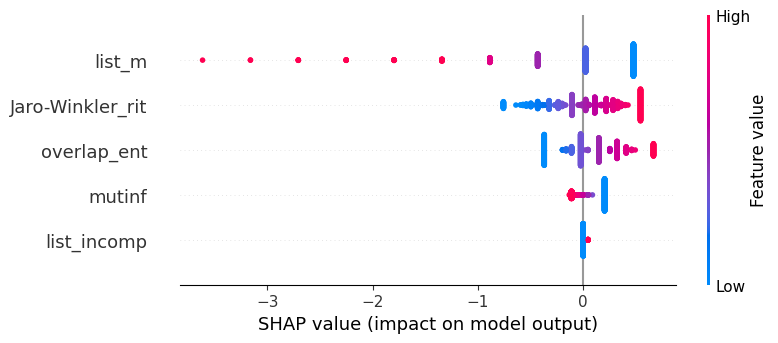

In [66]:
shap.plots.beeswarm(shap_values)

In [67]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.         0.8        0.33333333 0.89697426 0.11111111] 0 1


IndexError: index 5 is out of bounds for axis 0 with size 5

In [65]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.57684496 0.         0.         0.
 0.         0.         0.         0.         0.29411765 0.
 0.42857143 1.         0.         0.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

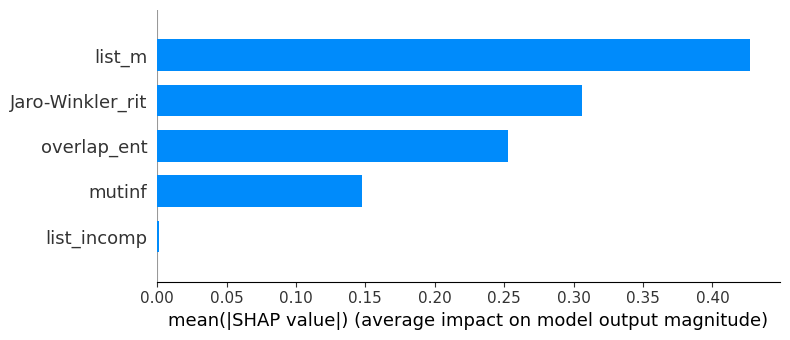

In [68]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

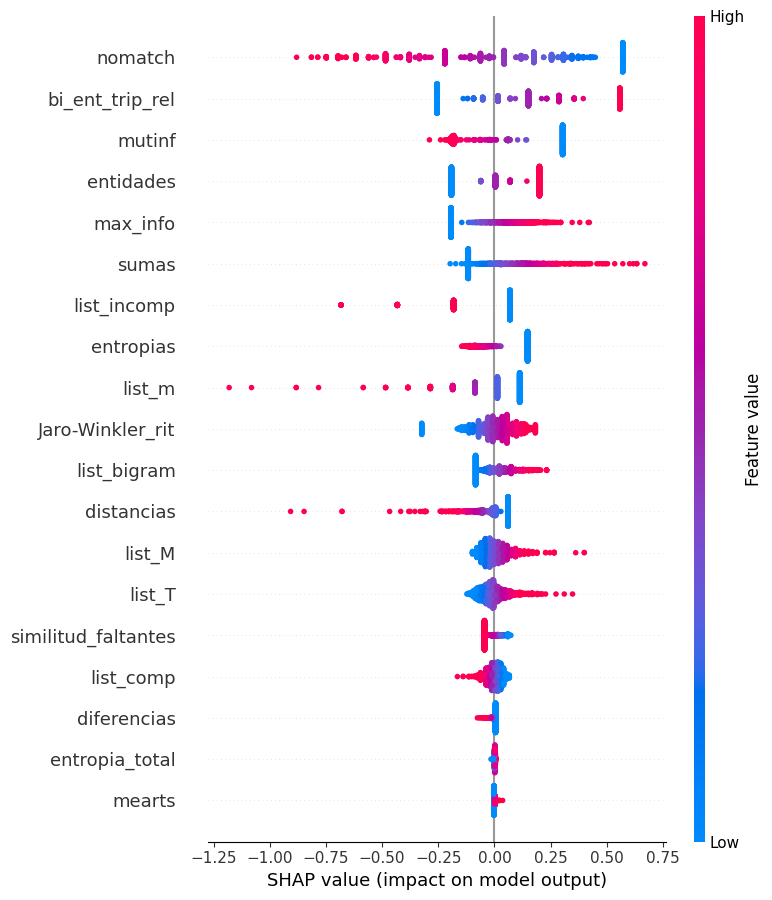

In [96]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

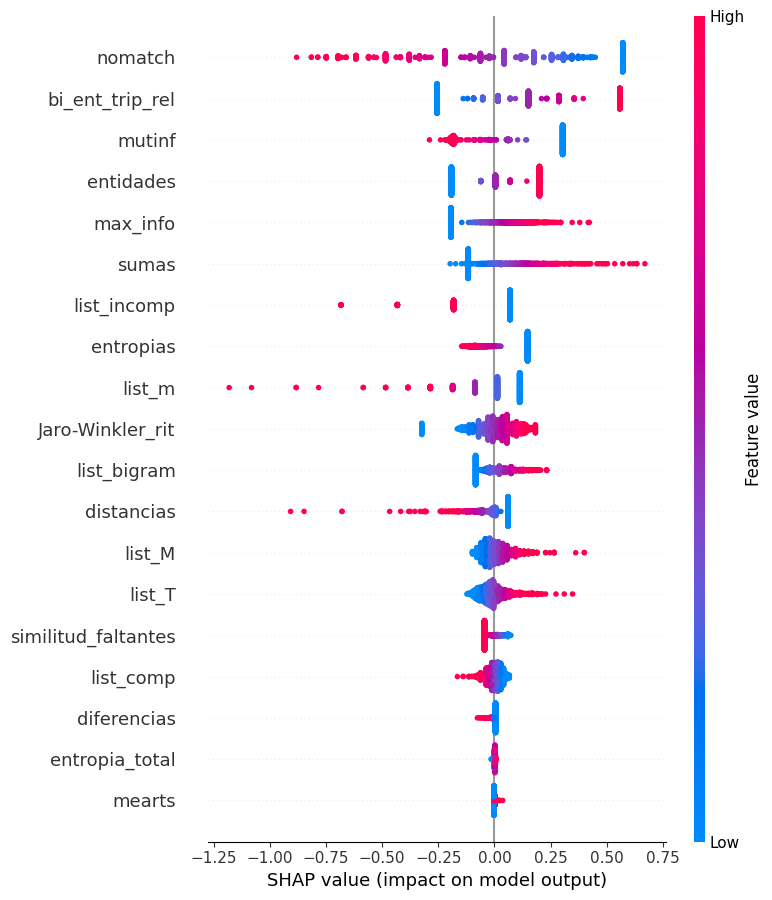

In [97]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

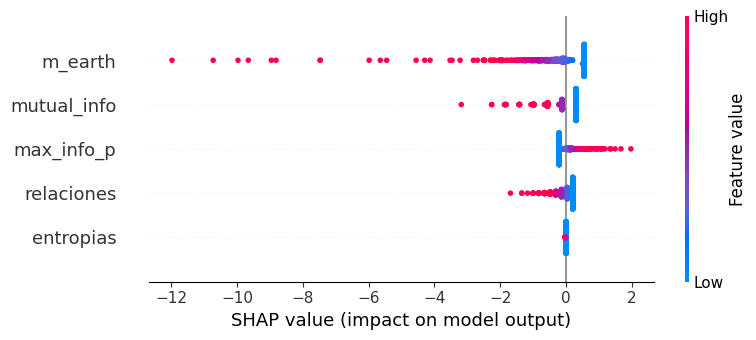

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [197]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [204]:
clf = DecisionTreeClassifier(splitter="random",criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [205]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.65
precision:  0.64
recall 0.72
f1_score:  0.68
matthews_score:  0.3


In [206]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [207]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.620000 (0.038039)
DecisionTree: 0.630000 (0.036153)
DecisionTree: 0.680000 (0.060250)
DecisionTree: 0.650000 (0.030989)


In [202]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[256, 134],
       [183, 227]])

Profundidad del árbol: 22
Número de nodos terminales: 278


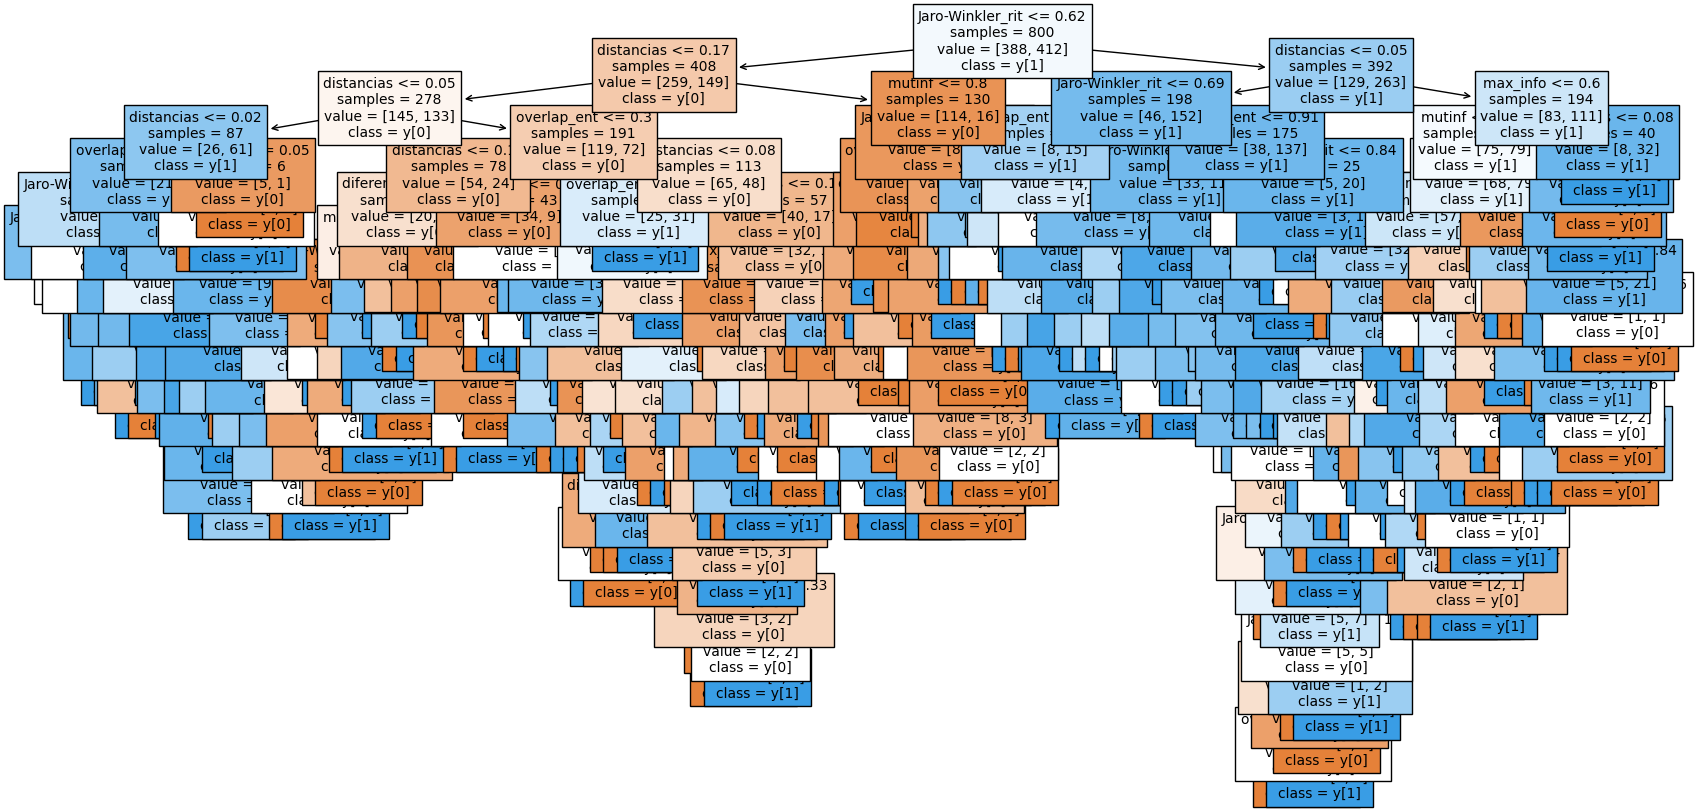

In [203]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )